In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import re
from collections import defaultdict, Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import GridSearchCV
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  1552 non-null   object 
 1   Su        1552 non-null   int64  
 2   Sy        1552 non-null   int64  
 3   E         1552 non-null   int64  
 4   G         1552 non-null   int64  
 5   mu        1552 non-null   float64
 6   Ro        1552 non-null   int64  
 7   Use       1552 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 86.5+ KB


In [3]:
data.isnull().sum()

,0
Material,0
Su,0
Sy,0
E,0
G,0
mu,0
Ro,0
Use,0


In [4]:
data.duplicated().sum()

4

In [5]:
print(f'shape before dropping duplicates : {data.shape}')
data = data.drop_duplicates()
print(f'shape after dropping duplicates {data.shape}')

shape before dropping duplicates : (1552, 8)
shape after dropping duplicates (1548, 8)


In [6]:
data

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.30,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.30,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.30,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.30,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.30,7860,True
...,...,...,...,...,...,...,...,...
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False


In [7]:
import matplotlib.pyplot as plt

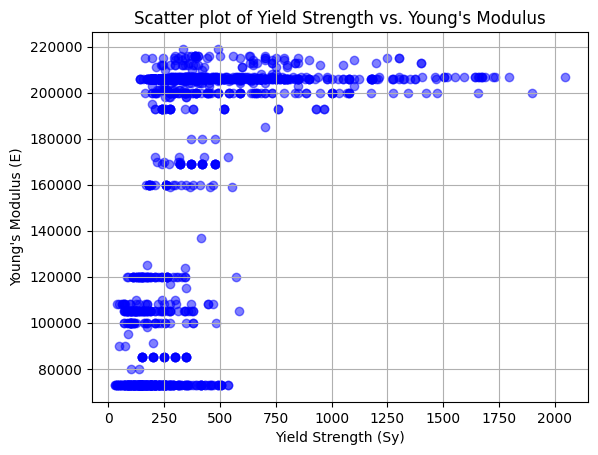

In [8]:
plt.scatter(data['Sy'], data['E'], c='blue', alpha=0.5)
plt.xlabel('Yield Strength (Sy)')
plt.ylabel("Young's Modulus (E)")
plt.title("Scatter plot of Yield Strength vs. Young's Modulus")
plt.grid(True)
plt.show()

In [9]:
import seaborn as sns

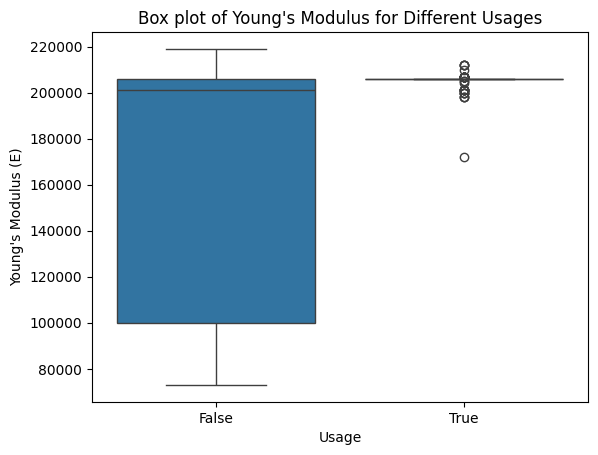

In [10]:
sns.boxplot(x='Use', y='E', data=data)
plt.xlabel('Usage')
plt.ylabel("Young's Modulus (E)")
plt.title("Box plot of Young's Modulus for Different Usages")
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

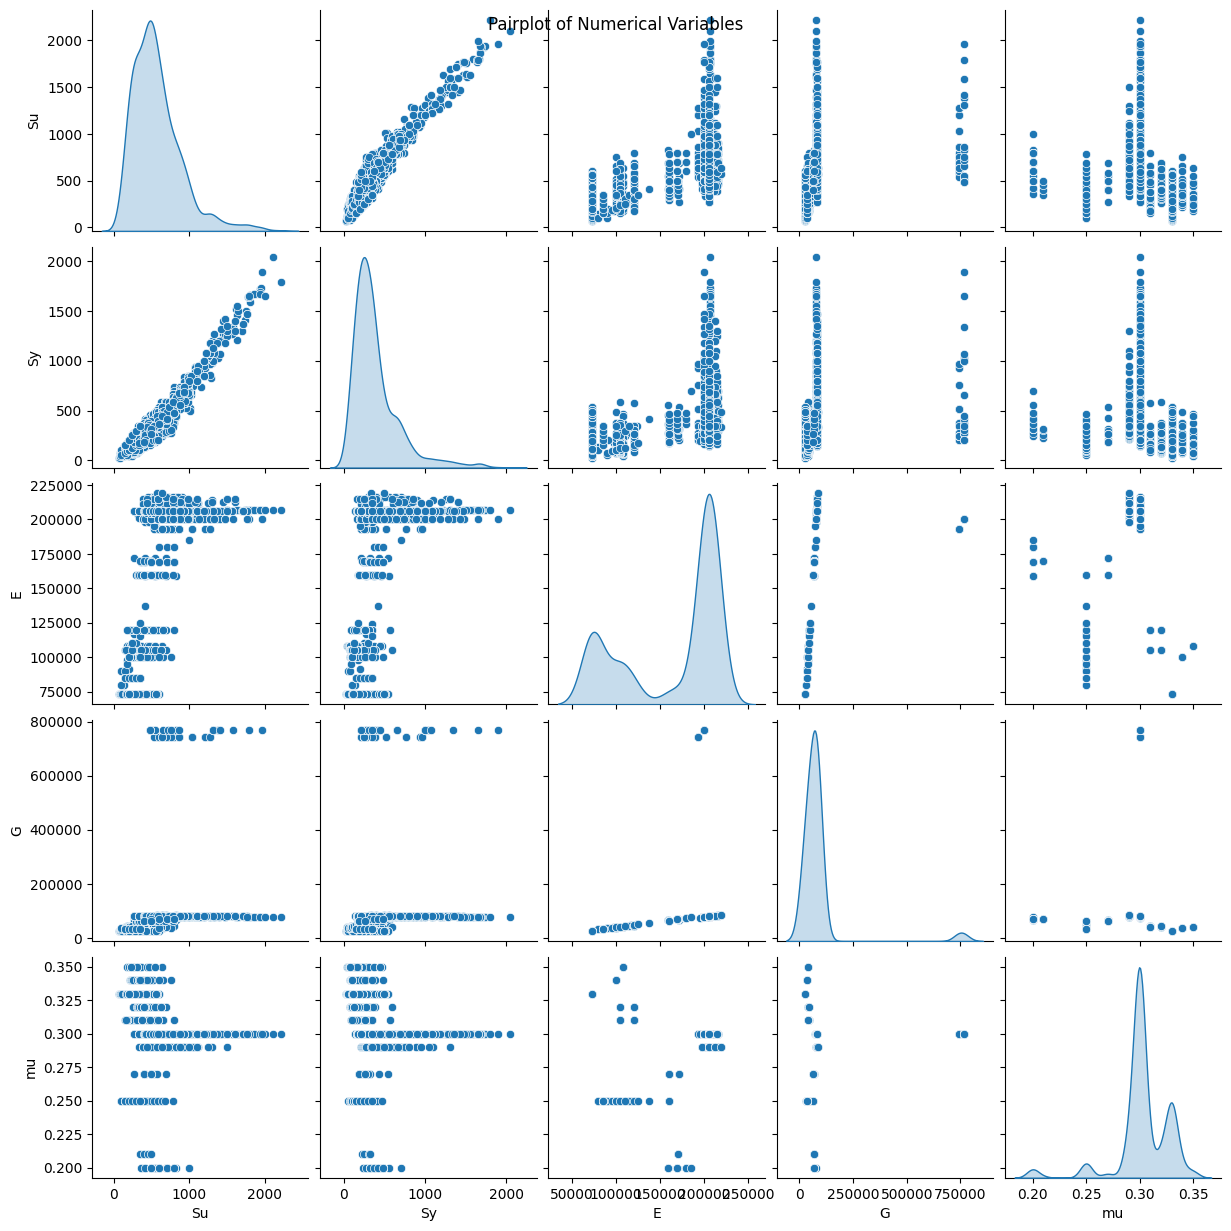

In [11]:
sns.pairplot(data.drop(columns=['Use', 'Ro']), diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

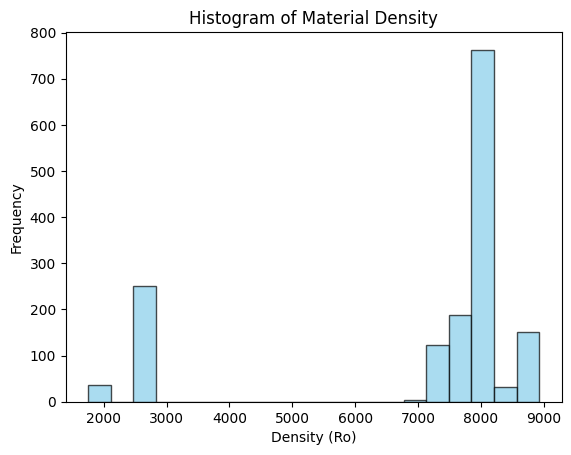

In [12]:
plt.hist(data['Ro'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Density (Ro)')
plt.ylabel('Frequency')
plt.title('Histogram of Material Density')
plt.show()

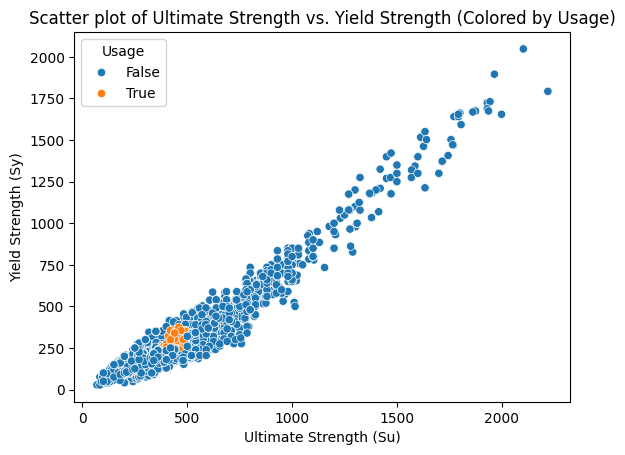

In [13]:
sns.scatterplot(x='Su', y='Sy', hue='Use', data=data)
plt.xlabel('Ultimate Strength (Su)')
plt.ylabel('Yield Strength (Sy)')
plt.title('Scatter plot of Ultimate Strength vs. Yield Strength (Colored by Usage)')
plt.legend(title='Usage')
plt.show()

In [14]:
# Splitting data into features and target
X = data.iloc[:, 1:-1]   # All columns except the first and last one
y = data.iloc[:, -1]     # Only the last column as the target

# Encoding target labels if needed
le = LabelEncoder()
y = le.fit_transform(y)


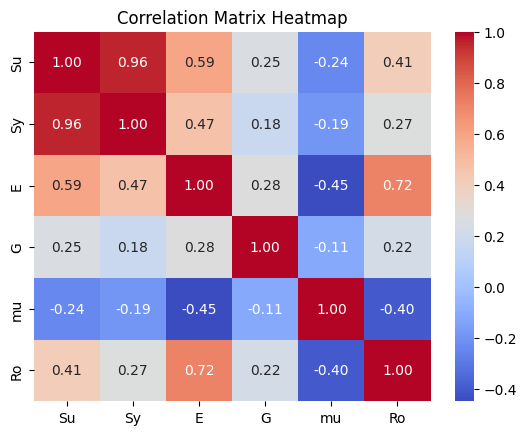

In [15]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X.values]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances from x to all training samples
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train.values]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))


In [17]:
import numpy as np
noise_factor = 0.08
X = X + noise_factor * np.random.normal(size=X.shape)

In [18]:
y_noisy = y.copy()
noise_level = 0.035
flip_indices = np.random.choice(np.arange(len(y)), size=int(noise_level * len(y)), replace=False)
y[flip_indices] = 1 - y[flip_indices]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = CustomKNN()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(f'accuracy score of custom decision tree classifier is : {accuracy_score(y_true=y_test , y_pred= pred)*100}')

accuracy score of custom decision tree classifier is : 95.80645161290322


In [21]:
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, iterations=1000, regularization=None, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.regularization = regularization  # None or 'l2'
        self.lambda_ = lambda_                # Regularization strength
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Convert X and y to NumPy arrays if they aren’t already
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.iterations):
            # Forward propagation
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Apply L2 regularization to the weight gradient
            if self.regularization == 'l2':
                dw += (self.lambda_ / n_samples) * self.weights

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to 0 or 1
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls


In [22]:
model = CustomLogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(f'Accuracy of logistic regression model is : {accuracy_score(y_test,pred)*100:.2f}')

Accuracy of logistic regression model is : 89.68


In [23]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],          # Different learning rates
    'iterations': [500, 1000, 2000],              # Different numbers of iterations
    'lambda_': [0.01, 0.1,0.5, 1]                     # Regularization strength for L2
}

# Initialize your custom logistic regression model
model = CustomLogisticRegression(regularization='l2')

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and score
print("Best Parameters:", grid_search.best_params_)

# Test the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Accuracy of logistic regression model with l2 regularisation is : {accuracy_score(y_test, y_pred)*100:.2f}")

Best Parameters: {'iterations': 500, 'lambda_': 0.01, 'learning_rate': 0.001}
Accuracy of logistic regression model with l2 regularisation is : 89.68


In [41]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class CustomDecisionTreeClassifier():
    def __init__(self, max_depth=2, min_samples=2):
        self.root = None
        self.max_depth = max_depth
        self.min_samples = min_samples

    def create_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # Check stopping conditions
        if num_samples >= self.min_samples and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)

            # Proceed if a valid split with positive info_gain is found
            if "info_gain" in best_split and best_split["info_gain"] > 0:
                left_subtree = self.create_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.create_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # If no valid split, create a leaf node
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {"info_gain": 0}  # Start with default info_gain to avoid KeyError
        max_gain = -np.inf

        for feat_index in range(num_features):
            feat_values = dataset[:, feat_index]
            for threshold in np.unique(feat_values):
                left, right = self.split(dataset, feat_index, threshold)
                if len(left) > 0 and len(right) > 0:
                    y = dataset[:, -1]
                    y_left = left[:, -1]
                    y_right = right[:, -1]

                    if len(y_left) > 0 and len(y_right) > 0:
                        curr_gain = self.calculate_gain(y, y_left, y_right)
                        if curr_gain > max_gain:
                            best_split["info_gain"] = curr_gain
                            best_split["dataset_left"] = left
                            best_split["dataset_right"] = right
                            best_split["threshold"] = threshold
                            best_split["feature_index"] = feat_index
                            max_gain = curr_gain
        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def calculate_gain(self, y, y_left, y_right):
        total = len(y)
        total_l = len(y_left)
        total_r = len(y_right)

        gini = 1 - sum([(np.sum(y == c) / total) ** 2 for c in np.unique(y)])
        gini_l = 1 - sum([(np.sum(y_left == c) / total_l) ** 2 for c in np.unique(y_left)])
        gini_r = 1 - sum([(np.sum(y_right == c) / total_r) ** 2 for c in np.unique(y_right)])

        gain = gini - ((total_l / total) * gini_l + (total_r / total) * gini_r)
        return gain

    def calculate_leaf_value(self, Y):
        # Convert the target values to integers before applying bincount
        Y = Y.astype(int)
        return np.bincount(Y).argmax()

    def fit(self, X, y):
        y = y.ravel()
        y = y.reshape(-1,1)
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.create_tree(dataset)

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            predictions.append(self.make_prediction(X.iloc[i,:], self.root))
        return predictions

    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)
        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)



In [25]:
model = CustomDecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(f'accuracy score of custom decision tree classifier is : {accuracy_score(y_true=y_test , y_pred= pred)*100}')

accuracy score of custom decision tree classifier is : 93.54838709677419


In [51]:
import numpy as np

# Assume CustomizedDecisionTree is your custom tree class
def gradient_boosting(X, y, n_estimators=100, learning_rate=0.1):
    predictions = np.zeros(y.shape)
    models = []

    for i in range(n_estimators):
        # Compute pseudo-residuals
        residuals = y - predictions

        # Train custom tree on residuals
        tree = CustomDecisionTreeClassifier()
        tree.fit(X, residuals)
        predictions += learning_rate * np.array(tree.predict(X))

        # Store the model
        models.append(tree)

    return models

def predict_gb(models, X, learning_rate=0.1):
    predictions = np.zeros(X.shape[0])
    for tree in models:
        predictions += learning_rate * np.array(tree.predict(X))
    return predictions > 0.5  # Threshold for binary classification


In [48]:
# Train the gradient boosting model
models = gradient_boosting(X_train, y_train, n_estimators=100, learning_rate=0.1)


In [52]:
# Make predictions
y_pred = predict_gb(models, X_test, learning_rate=0.1)

# Convert boolean predictions to integers
y_pred = y_pred.astype(int)


In [53]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy with Custom Decision Tree: {accuracy * 100:.2f}%")


Gradient Boosting Accuracy with Custom Decision Tree: 89.68%


In [38]:
from sklearn.utils import resample

def custom_random_forest(X, y, n_estimators=100):
    forest = []
    for _ in range(n_estimators):
        X_sample, y_sample = resample(X, y)
        tree = CustomDecisionTreeClassifier()  # Assuming your custom Decision Tree class is named `CustomizedDecisionTree`
        tree.fit(X_sample, y_sample)
        forest.append(tree)
    return forest

def predict_forest(forest, X):
    predictions = [tree.predict(X) for tree in forest]
    return np.mean(predictions, axis=0) > 0.5

In [42]:
forest = custom_random_forest(X_train, y_train, n_estimators=100)

# Making predictions
y_pred = predict_forest(forest, X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Custom Random Forest Accuracy: {accuracy * 100:.2f}%")

Custom Random Forest Accuracy: 96.13%


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print(f'Accuracy score of RandomForestClassifier is: {accuracy * 100:.2f}')


Accuracy score of RandomForestClassifier is: 95.81


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
accuracy = gbm.score(X_test, y_test)
print(f'accuracy score of GradientBoostingClassifier is : {accuracy*100:.2f}')

accuracy score of GradientBoostingClassifier is : 96.13


In [30]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
accuracy = xgb.score(X_test, y_test)
print(f'accuracy score of XGBClassifier is : {accuracy*100:.2f}')

accuracy score of XGBClassifier is : 96.13


In [32]:
pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.4 MB/s eta 0:00:00


In [33]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm.fit(X_train, y_train)
accuracy = lgbm.score(X_test, y_test)
print(f'accuracy score of LGBMclassifier is : {accuracy*100:.2f}')

[LightGBM] [Info] Number of positive: 143, number of negative: 1095
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1238, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115509 -> initscore=-2.035665
[LightGBM] [Info] Start training from score -2.035665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [34]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.3 MB/s eta 0:00:00


In [35]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, silent=True)
catboost.fit(X_train, y_train)
accuracy = catboost.score(X_test, y_test)
print(f'accuracy score of CatBoostClassifier is : {accuracy*100:.2f}')


accuracy score of CatBoostClassifier is : 96.13


In [36]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [37]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Further fine-tuned base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.02, max_depth=7, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.02, max_depth=7, random_state=42))
]

# Using a more complex XGBoost as the final estimator
final_estimator = XGBClassifier(n_estimators=200, learning_rate=0.02, max_depth=6, random_state=42)

# Stacking classifier
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stack.fit(X_train, y_train)
accuracy = stack.score(X_test, y_test)
print(f'Accuracy score of Stacking Ensemble classifier is: {accuracy * 100:.2f}%')


[LightGBM] [Info] Number of positive: 143, number of negative: 1095
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1238, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115509 -> initscore=-2.035665
[LightGBM] [Info] Start training from score -2.035665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be